In [3]:
import sys

base_path = '/home/yurid/git/tcc'
sys.path.insert(0, base_path)

In [17]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.utils.statistics import plot_acf, check_seasonality

In [4]:
filename = f'{base_path}/data/daily_barbacena.csv'

In [8]:
df_temp = pd.read_csv(
    filename,
    sep=',',
    parse_dates=['Timestamp'],
    index_col=['Timestamp'])

init_index = lambda _df: _df[_df.RADIATION != 0].index[0]

df = df_temp[['RADIATION', 'TEMP', 'HUMIDITY_h']] \
    .resample('D') \
    .agg({'RADIATION': np.sum})

df = df.loc[df.index >= init_index(df)].replace(0, np.nan)

In [24]:
ts = TimeSeries.from_dataframe(df, fillna_value=True)
ts

<TimeSeries (DataArray) (Timestamp: 7226, component: 1, sample: 1)>
array([[[17306. ]],

       [[10357. ]],

       [[10708. ]],

       ...,

       [[ 8122. ]],

       [[ 7987.6]],

       [[12501.4]]])
Coordinates:
  * Timestamp  (Timestamp) datetime64[ns] 2003-03-21 2003-03-22 ... 2022-12-31
  * component  (component) object 'RADIATION'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

<AxesSubplot:xlabel='Timestamp'>

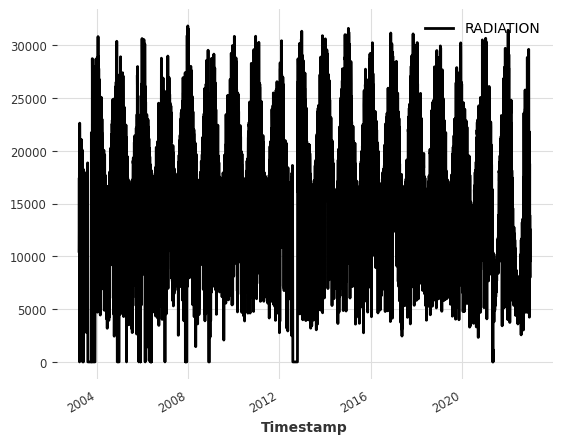

In [16]:
ts.plot()

<AxesSubplot:xlabel='Timestamp'>

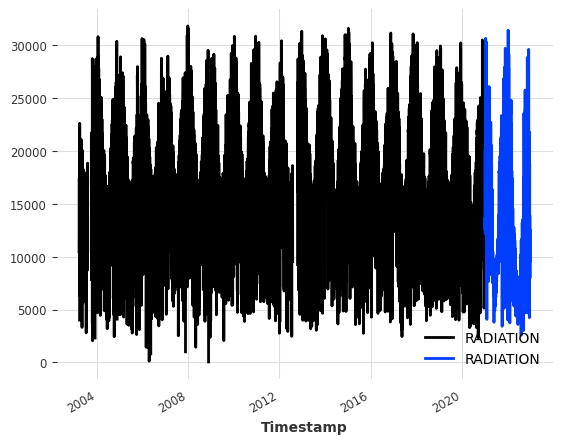

In [12]:
train, test = ts.split_before(0.9)
train.plot()
test.plot()


In [25]:
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta
from darts.metrics import mape

def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(test))
    print("model {} obtains MAPE: {:.2f}%".format(model, mape(test, forecast)))


#eval_model(ExponentialSmoothing())
eval_model(TBATS())
eval_model(AutoARIMA())
eval_model(Theta())

InputArgsException: y series is invalid